In [38]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [39]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [40]:
df=pd.read_csv('merged_dataset.csv')

In [41]:
df.shape

(782, 30)

In [49]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.12312,1.850238,78.5,Afghanistan,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.12312,1.850238,78.5,Afghanistan,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.12312,1.850238,78.5,Afghanistan,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.12312,1.850238,78.5,Afghanistan,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.12312,1.850238,78.5,Afghanistan,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299


In [48]:
# Impute missing values for numeric columns with mean
numeric_columns = df.select_dtypes(include=['float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Impute missing values for categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)



Missing Values After Imputation:
 Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Health..Life.Expectancy.         0
Trust..Government.Corruption.    0
Dystopia.Residual                0
Overall rank                     0
Country or region                0
Score                            0
GDP per capita                   0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Perceptions of corrup

In [51]:
# Assuming 'df' is your DataFrame
columns_to_drop = ['Country or region']  # List of columns to drop

# Drop the specified columns from the DataFrame
df = df.drop(columns_to_drop, axis=1)

# Now 'df' will not contain the dropped columns


In [52]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299


In [53]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')

In [54]:
df.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Lower Confidence Interval        0
Upper Confidence Interval        0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Health..Life.Expectancy.         0
Trust..Government.Corruption.    0
Dystopia.Residual                0
Overall rank                     0
Score                            0
GDP per capita                   0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Perceptions of corruption        0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 782 non-null    float64
 1   Happiness Score                782 non-null    float64
 2   Standard Error                 782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  782 non-null    float64
 8   Generosity                     782 non-null    float64
 9   Dystopia Residual              782 non-null    float64
 10  Lower Confidence Interval      782 non-null    float64
 11  Upper Confidence Interval      782 non-null    float64
 12  Happiness.Rank                 782 non-null    flo

In [56]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.551341,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299


In [57]:
df.to_csv('Clean_data_Numeric.csv')

In [58]:
# Select columns which are object type (categorical)
categorical_cols = df.select_dtypes(include=['object']).columns

In [59]:
# Use pd.get_dummies to convert categorical columns to one-hot encoded variables
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [60]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [61]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\clust

[-1596411.5746402028,
 -1185373.0452002876,
 -909651.5971329145,
 -666131.910718316,
 -454181.4295334231,
 -291186.84515546495,
 -177807.79464920092,
 -153546.89981791627,
 -129693.5858382197]

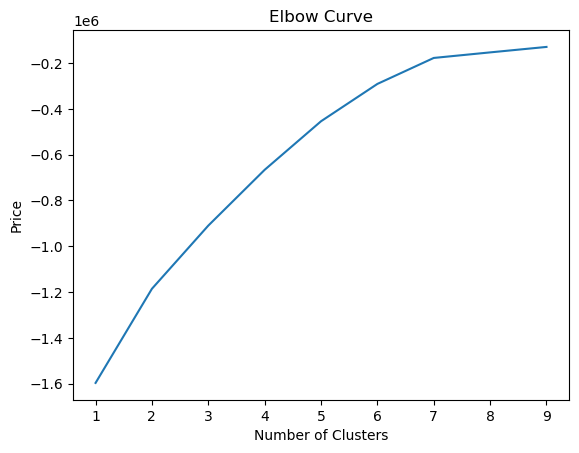

In [62]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Price')
pl.title('Elbow Curve')
pl.show()

In [ ]:
The optimal cluster count is three, as indicated by the large jump from two to three on the x-axis.

In [63]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [64]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [65]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\vrich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,clusters
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0.12312,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2


In [67]:
df['clusters'].value_counts()

clusters
1    540
2    122
0    120
Name: count, dtype: int64

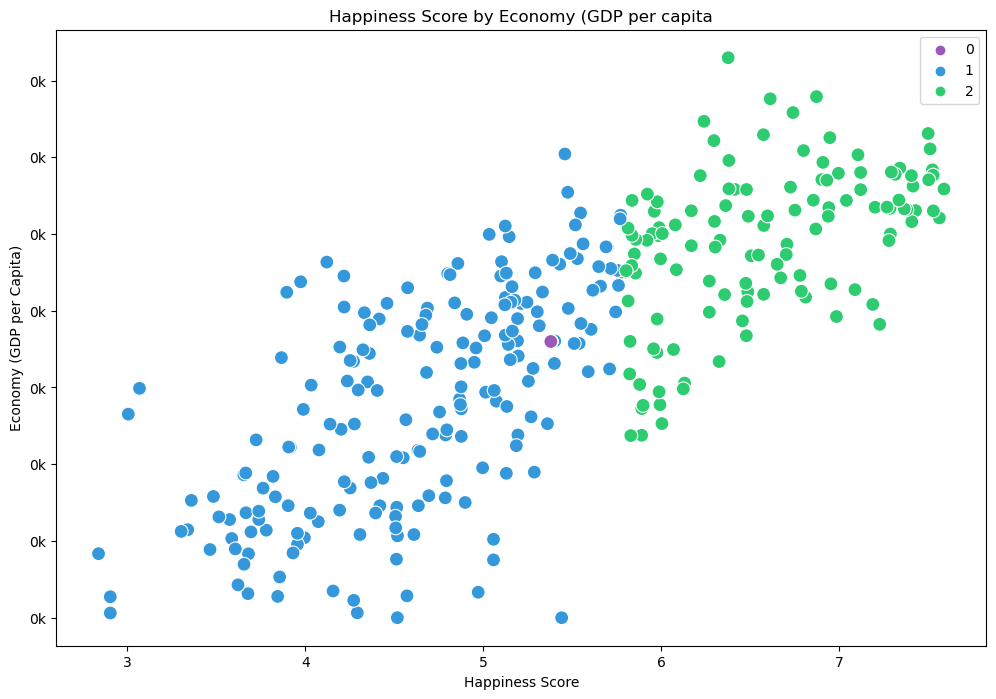

In [71]:
#plotting 
plt.figure(figsize=(12, 8))

# custom color palette
palette = sns.color_palette(['#9b59b6', '#3498db', '#2ecc71'])  # Dark purple, blue, green

# scatterplot 
ax = sns.scatterplot(x=df['Happiness Score'], y=df['Economy (GDP per Capita)'], hue=kmeans.labels_, s=100, palette=palette)

# Removing the grid from the background.
ax.grid(False)

# x-axis and y-axis.
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')

# title 
plt.title('Happiness Score by Economy (GDP per capita')

# assigning names to clusters based on the label
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'blue'
df.loc[df['clusters'] == 0, 'cluster'] = 'green'

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

# Your code...


#saving chart to PNG
plt.savefig('Happiness Score by Economy .png')
plt.show()

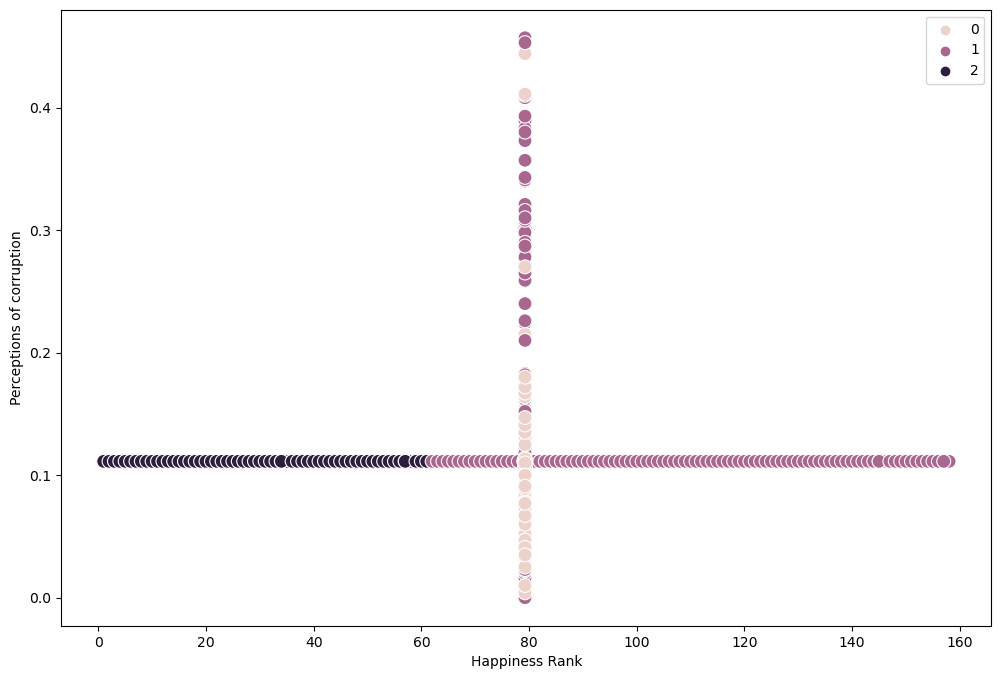

In [74]:
# Plot the clusters for the "availability_365" and "calculated_host_listings_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Happiness Rank'], y=df['Perceptions of corruption'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Happiness Rank') 
plt.ylabel('Perceptions of corruption') 
plt.show()

In [75]:
df.loc[df['clusters'] == 4, 'cluster'] = 'darkest purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'darker purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'lilac'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [76]:
df.groupby('cluster').agg({'Happiness Rank':['mean', 'median'], 
                         'Happiness Score':['mean', 'median'], 
                         'Perceptions of corruption':['mean', 'median']
                          })

Happiness Rank            Happiness Score            \
                  mean     median            mean    median   
cluster                                                       
lilac        90.140035  79.238095        5.111062  5.378949   
pink         79.238095  79.238095        5.378949  5.378949   
purple       30.983607  31.000000        6.564680  6.486500   

        Perceptions of corruption            
                             mean    median  
cluster                                      
lilac                    0.115325  0.111299  
pink                     0.093183  0.082000  
purple                   0.111299  0.111299

In [80]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Dystopia.Residual,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,clusters,cluster
0,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2,dark purple
1,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2,dark purple
2,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2,dark purple
3,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2,dark purple
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,1.850238,78.5,5.391506,0.898298,1.211026,0.661295,0.423538,0.111299,2,dark purple


In [ ]:
With a mean happiness rank of 90, the cluster lilac is less happy than other clusters. With a mean happiness score of 5.11, less happiness is indicated.The study shows that different countries have different perceptions of corruption and different happiness scores and ranks. The lilac cluster's member nations are perceived as being more corrupt and are also the least happy. The happiest countries are those in the purple cluster, while those in the pink cluster have slightly higher happiness scores and lower perceptions of corruption.  The mean and the median agree with each other. The average perception of corruption in this cluster is 0.115, indicating a higher perception. The happiness rank and happiness score are consistent, slightly higher than the lilac cluster but still low. The mean and median happiness scores are around 5.38, while the perception of corruption is lower.Like the lilac cluster, the purple cluster has a mean perception of corruption of 0.111, a mean happiness rank of 31, and a higher happiness score of 6.56. These variables show average relative happiness.
